In this notebook, i will build recommendation system for Arsenal FC which is football club from North London. The datasets are provided at https://www.kaggle.com . The main objectives of this project is to increase Arsenal FC values by creating recommendation system based on several factor such as player's similarity and player's improvement coeffecient. 

There are 3 main steps on this project :
1. Data Imputation
2. Data Cleaning and Preparation
3. EDA and Recommendation System


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.rcParams['figure.figsize'] = (10.0, 5.0)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)
warnings.filterwarnings("ignore")

In [2]:
def textinsideplot(x_pos, y_pos, teks, font_size=16):
    plt.gcf().text(x_pos, y_pos, teks, fontdict={'size': font_size, 'verticalalignment': 'top', 'horizontalalignment': 'left'})
    
def histograms(data_frame, feature_name, n_bins, plot_label, plot_title,grid=True,density=False):
    sea_plot = sns.distplot(data_frame[feature_name], kde=density, bins=n_bins)

    p5, q1, q2, q3, p95 = np.percentile(data_frame[feature_name], [5, 25, 50, 75, 95])
    mean_feature = np.around(np.mean(data_frame[feature_name]), 2)
    min_feature = np.around(np.min(data_frame[feature_name]), 2)
    std_feature = np.around(np.std(data_frame[feature_name]), 2)
    var_feature = np.around(np.var(data_frame[feature_name]), 2)
    max_feature = np.around(np.max(data_frame[feature_name]), 2)
    count_feature = np.around(np.size(data_frame[feature_name],0), 2)

    plt.xlabel(plot_label[0], fontsize=10, fontweight='black', color = '#333F4B')
    plt.ylabel(plot_label[1], fontsize=10, fontweight='black', color = '#333F4B')
    plt.axvline(x=mean_feature, color='c', linestyle='--', label='Mean')
    plt.axvline(x=np.around(q2, 2), color='m', linestyle='--', label='Median')
    plt.axvline(x=np.around(p5, 2), color='b', linestyle='--', label='Percentile-5%')
    plt.axvline(x=np.around(p95, 2), color='r', linestyle='--', label='Percentile-95%')
    plt.axvline(x=np.around(q1, 2), color='g', linestyle='--', label='Q1')
    plt.axvline(x=np.around(q3, 2), color='y', linestyle='--', label='Q3')
    
    plt.title(plot_title, loc='left', fontdict={'family': 'corbel', 'color': 'black', 'size': 8})
    
    stat_desc = "Count: " + str(count_feature) + "\nMean: " + str(mean_feature) + "\nStdDev: " + str(std_feature) \
        + "\nVariansi: " + str(var_feature) + "\nMin: " + str(min_feature) \
            + "\nPercentile-5%: " + str(np.around(p5, 2)) + "\nQ1: " + str(np.around(q1, 2)) \
                + "\nMedian: " + str(np.around(q2, 2)) + "\nQ3: " + str(np.around(q3, 2)) \
                    + "\nPercentile-95%: " + str(np.around(p95, 2)) + "\nIQR: " + str(np.around(q3-q1, 2)) + "\nMax: " + str(max_feature) 
    
    textinsideplot(0.89, 0.86, stat_desc, font_size=12)
    
    sea_plot.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.legend(title_fontsize=60)
    
    plt.grid(grid)
    plt.show()    
    plt.close()

DATA IMPUTATION

In [89]:
df2017 = pd.read_csv(r"C:\Users\Armananda Ferialdy\Documents\Dataset\players_17.csv")
df2018 = pd.read_csv(r"C:\Users\Armananda Ferialdy\Documents\Dataset\players_18.csv")
df2019 = pd.read_csv(r"C:\Users\Armananda Ferialdy\Documents\Dataset\players_19.csv")
df2020 = pd.read_csv(r"C:\Users\Armananda Ferialdy\Documents\Dataset\players_20.csv")

There will be 3 steps for Data Cleaning and Preparation:
1. Currency Adjustment
2. Feature's Position Engineering
3. Feature's Skill Engineering

- Data Cleaning Step 1 : Currency adjustment

In [90]:
def cleaningstep1(data):
    data['value_eur'] = data['value_eur']/1000000
    data['wage_eur'] = data['wage_eur']/1000000
    data['release_clause_eur'] = data['release_clause_eur']/1000000
    data = data.rename(columns={'value_eur':'Value','wage_eur':'Wage','team_position':'Position',
                                'release_clause_eur':'ReleaseClause','short_name':'Name'})
    data = data.drop(['player_url','long_name','dob','real_face','player_tags',
                     'player_positions','body_type','player_traits'],axis=1)
    return data

df2017 = cleaningstep1(df2017)
df2018 = cleaningstep1(df2018)
df2019 = cleaningstep1(df2019)
df2020 = cleaningstep1(df2020)

- Data Cleaning Step 2 : Feature's Position Engineering

In [91]:
positioncolumns = ['ls', 'st', 'rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
               'ram', 'lm', 'lcm', 'cm','rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm',
               'rwb', 'lb', 'lcb', 'cb','rcb', 'rb']

def cleaningposition(data):
    data = data.map(pd.eval).astype(int)
    return data

def altposition(data,pos):
    data['Altposition1'] = np.where((data['Altposition1']=='a')&(data[pos]>0),pos,data['Altposition1'])
    return data

def altposition2(data,pos):
    data['Altposition2'] = np.where((data['Altposition2']=='a')&(data['Altposition1']!=pos)&(data[pos]>0),pos,data['Altposition2'])
    return data

def altposition3(data,pos):
    data['Altposition3'] = np.where((data['Altposition3']=='a')&(data['Altposition1']!=pos)&(data['Altposition2']!=pos)&(data[pos]>0),pos,data['Altposition3'])
    return data

def cleaningstep2 (data):
    data[['ls', 'st', 'rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
        'ram', 'lm', 'lcm', 'cm','rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm',
        'rwb', 'lb', 'lcb', 'cb','rcb', 'rb']] = data[['ls','st', 'rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
                                                    'ram','lm', 'lcm', 'cm','rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm',
                                                    'rwb','lb','lcb','cb','rcb','rb']].fillna(0).apply(cleaningposition)
    
    df = data[['Name','ls', 'st', 'rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
               'ram', 'lm', 'lcm', 'cm','rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm',
               'rwb', 'lb', 'lcb', 'cb','rcb', 'rb']]
    
    df = (df[df['cm']>0]).melt(id_vars=["Name"], var_name="Position", value_name="Rating").reset_index()
    df = df.groupby('Name')['Rating','Position'].apply(lambda x: x.nlargest(3,columns=['Rating']))
    df = (df.reset_index().drop(['level_1'],axis=1)).pivot_table('Rating',['Name'],'Position').fillna(0).reset_index()
    
    df['Altposition1'] = 'a'
    df['Altposition2'] = 'a'
    df['Altposition3'] = 'a'
    
    
    for i in positioncolumns : 
        df = altposition(df,i)
    
    for i in positioncolumns : 
        df = altposition2(df,i)

    for i in positioncolumns :
        df = altposition3(df,i)
    
    df = df.drop(positioncolumns,axis=1)
    
    data = pd.merge(data,df,on='Name')
    data = data.drop(positioncolumns,axis=1)
    data['Altposition1'] = data['Altposition1'].str.upper()
    data['Altposition2'] = data['Altposition2'].str.upper()
    data['Altposition3'] = data['Altposition3'].str.upper()
    
    data['Position'] =  np.where((data['Altposition1']=='ST')|(data['Altposition1']=='RS')|(data['Altposition1']=='LS')|
                               (data['Altposition1']=='LW')|(data['Altposition1']=='RW')|(data['Altposition1']=='LF')|
                               (data['Altposition1']=='RF'),'ATK',
                              (np.where((data['Altposition1']=='LCM')|
                                      (data['Altposition1']=='RCM')|(data['Altposition1']=='CAM')|(data['Altposition1']=='RDM')|
                                      (data['Altposition1']=='RM')|(data['Altposition1']=='LDM')|(data['Altposition1']=='LM')|
                                      (data['Altposition1']=='CDM')|(data['Altposition1']=='CM')|(data['Altposition1']=='LAM')|
                                        (data['Altposition1']=='RAM'), 'MID', 'DEF')))
    
    return data

df2017 = cleaningstep2(df2017)
df2018 = cleaningstep2(df2018)
df2019 = cleaningstep2(df2019)
df2020 = cleaningstep2(df2020)

- Data Cleaning Step 3 : Feature's Skill Engineering

In [92]:
def cleaningskills(data):
    data = data.map(pd.eval).astype(int)
    return data

def cleaningstep3(data):
    data[['attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning',
        'goalkeeping_reflexes']]=data[['attacking_crossing','attacking_finishing', 
                                        'attacking_heading_accuracy','attacking_short_passing',
                                        'attacking_volleys', 'skill_dribbling','skill_curve', 
                                        'skill_fk_accuracy', 'skill_long_passing','skill_ball_control', 
                                        'movement_acceleration', 'movement_sprint_speed','movement_agility', 
                                        'movement_reactions', 'movement_balance','power_shot_power', 
                                        'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 
                                        'mentality_aggression', 'mentality_interceptions','mentality_positioning',
                                        'mentality_vision', 'mentality_penalties','defending_marking',
                                       'defending_standing_tackle','defending_sliding_tackle', 'goalkeeping_diving',
                                       'goalkeeping_handling', 'goalkeeping_kicking',
                                       'goalkeeping_positioning', 'goalkeeping_reflexes']].fillna(0).apply(cleaningskills)
    
    
    data['Defending'] = (round((data[['defending_marking', 'defending_standing_tackle',
                                      'defending_sliding_tackle','defending']].mean(axis=1)))).astype(int)
    
    data['General'] = (round((data[['dribbling','skill_dribbling','skill_ball_control']].mean(axis=1)))).astype(int)
    
    data['Mental'] = (round((data[['mentality_aggression', 'mentality_positioning',
                                   'mentality_composure','mentality_composure']].mean(axis=1)))).astype(int)
    
    data['Passing'] = (round((data[['passing','attacking_crossing', 'attacking_short_passing',
                                    'skill_long_passing','mentality_vision',]].mean(axis=1)))).astype(int)
    
    data['Physical'] = (round((data[['movement_acceleration', 'movement_sprint_speed','movement_agility',
                                     'movement_reactions','movement_balance', 'power_jumping', 'power_stamina', 
                                    'power_strength','pace','physic']].mean(axis=1)))).astype(int)
    
    data['Shooting'] = (round((data[['shooting','attacking_finishing', 'attacking_volleys', 'skill_fk_accuracy', 
                               'power_shot_power','power_long_shots', 'mentality_penalties',
                                'attacking_heading_accuracy','skill_curve']].mean(axis=1)))).astype(int)
    
    
    data = data[['sofifa_id','Name','age','club','overall','potential','Defending','General','Mental','Passing','Physical','ReleaseClause',
               'Position','Shooting','Wage','Value','loaned_from','joined','contract_valid_until'
                ,'Altposition1','Altposition2','Altposition3']]
    return data

df2017 = cleaningstep3(df2017)
df2018 = cleaningstep3(df2018)
df2019 = cleaningstep3(df2019)
df2020 = cleaningstep3(df2020)

In [93]:
df2017['Year'] = 2016.0
df2018['Year'] = 2017.0
df2019['Year'] = 2018.0
df2020['Year'] = 2019.0

def joined(df):
    df['joined'] = pd.to_datetime(df['joined'])
    df['joinedyear'] = df['joined'].dt.year
    df['newplayer'] = np.where(df['joinedyear']==df['Year'],1,0)
    return df

df2017 = joined(df2017)
df2018 = joined(df2018)
df2019 = joined(df2019)
df2020 = joined(df2020)

In [94]:
df2017.to_csv(r'C:\Users\Armananda Ferialdy\Documents\Dataset\players_2017.csv')
df2018.to_csv(r'C:\Users\Armananda Ferialdy\Documents\Dataset\players_2018.csv')
df2019.to_csv(r'C:\Users\Armananda Ferialdy\Documents\Dataset\players_2019.csv')
df2020.to_csv(r'C:\Users\Armananda Ferialdy\Documents\Dataset\players_2020.csv')

Value, Wage, and Release Clause Feature Analysis & EDA on Arsenal Football Club
- EDA on Arsenal Football Club
- Recommendation Hypothesis
- Create several new features
- Correlation analysis by using new features

In [3]:
df2017 = pd.read_csv(r'C:\Users\Armananda Ferialdy\Documents\Dataset\players_2017.csv')
df2018 = pd.read_csv(r'C:\Users\Armananda Ferialdy\Documents\Dataset\players_2018.csv')
df2019 = pd.read_csv(r'C:\Users\Armananda Ferialdy\Documents\Dataset\players_2019.csv')
df2020 = pd.read_csv(r'C:\Users\Armananda Ferialdy\Documents\Dataset\players_2020.csv')

EDA on Arsenal Football Club (with several other selected team)

In [4]:
selectedteam = ['Arsenal','Manchester United','Manchester City','Chelsea','Liverpool','Tottenham Hotspur',
               'FC Barcelona','Real Madrid','Atlético Madrid','FC Bayern München','Borussia Dortmund',
               'Paris Saint-Germain','Juventus']

dfh17 = df2017[df2017['club'].isin(selectedteam)]
dfh18 = df2018[df2018['club'].isin(selectedteam)]
dfh19 = df2019[df2019['club'].isin(selectedteam)]
dfh20 = df2020[df2020['club'].isin(selectedteam)]

dfh = pd.concat([dfh17,dfh18,dfh19,dfh20],ignore_index=True)
#dfh.to_csv(r"C:\Users\Armananda Ferialdy\Documents\Dataset\fifateam.csv")

Function Definition

In [5]:
def generaleda(df,year):
    df = df[df['Year']==year]
    list_position = df['Position'].unique()
    for pos in list_position :
        agepos = (df[df['Position']==pos])['age'].mean()
        countpos = len(df[df['Position']==pos])
        averagepos = (df[df['Position']==pos])['overall'].mean()
        averagesalary = str(round((df[df['Position']==pos])['Wage'].mean(),3)) + ' Millions Poundsterling'
        averagevalue = (df[df['Position']==pos])['Value'].mean()
        print('Average age for %s position is %d' %(pos,agepos))
        print('Count of %s position is %d' %(pos,countpos))
        print('Average overall for %s position is %d' %(pos,averagepos))
        print('Average salary for %s position is %s' %(pos,averagesalary))
        print('Average value for %s position is %d' %(pos,averagevalue))
        print(' ')
    
    clubvalue = df.groupby(['club']).agg({'Value':'sum'}).reset_index().sort_values(by='Value')
    sns.barplot(x='club',y='Value',data=clubvalue)
    plt.xticks(rotation=75)
    plt.title('Club Values')
    plt.show()
    
    cluboverall = df.groupby(['club']).agg({'overall':'mean'}).reset_index().sort_values(by='overall')
    sns.barplot(x='club',y='overall',data=cluboverall)
    plt.xticks(rotation=75)
    plt.title('Club Overall')
    plt.show()
    
    df['arsenal'] = np.where(df['club']=='Arsenal','Arsenal','Non-Arsenal')
    sns.scatterplot(x='age',y='overall',hue='arsenal',data=df)
    plt.title('Player Age and Overall Spreadness')
    plt.show()

In [6]:
def eda(df,club):
    df = df[df['club']==club]
    
    #Value per Year
    vpy = df.groupby(['Year']).agg({'Value':'sum'}).reset_index()
    ab = sns.lineplot(vpy['Year'],vpy['Value'])
    plt.title('Team Value per Year')
    plt.show()
    
    #Value per Position
    vpp = df.groupby(['Year','Position']).agg({'Value':'sum'}).reset_index()
    ax = sns.barplot(x='Year',y='Value',hue='Position',data=vpp)
    plt.title('Value per Position')
    plt.show()
    
    #Player purchase per Year
    vpurchase = df[df['newplayer']==1]
    vpurchase = vpurchase.groupby(['Year','Position']).agg({'Value':'sum'}).reset_index()
    ay = sns.barplot(x='Year',y='Value',hue='Position',data=vpurchase)
    plt.title('Total Purchase Value per Position & Year')
    plt.show()
    
    #Overall per Position
    rpp = df.groupby(['Year','Position']).agg({'overall':'mean'}).reset_index()
    az = sns.lineplot(x='Year',y='overall',hue='Position',data=rpp)
    plt.title('Overall per Position')
    plt.show()
    
    #Top 10 Player Overall per Position
    opp = (df[df['Year']==2019].sort_values(by='overall',ascending=False))[:10]
    opp = opp.groupby(['Position']).agg({'overall':'mean'}).reset_index()
    ao = sns.barplot(x='Position',y='overall',data=opp)
    plt.title('Overall Top Player per Position')
    plt.show()
    
    
    
    #Player EDA
    print('Ovensive Position Player Count: {}'.format(len(df[(df['Position']=='ATK')&(df['Year']==2019)])))
    print('Midfielder Position Player Count: {}'.format(len(df[(df['Position']=='MID')&(df['Year']==2019)])))
    print('Defender Position Player Count: {}'.format(len(df[(df['Position']=='DEF')&(df['Year']==2019)])))
    
    return plt.show()

Average age for ATK position is 23
Count of ATK position is 131
Average overall for ATK position is 77
Average salary for ATK position is 0.103 Millions Poundsterling
Average value for ATK position is 23
 
Average age for MID position is 24
Count of MID position is 116
Average overall for MID position is 78
Average salary for MID position is 0.104 Millions Poundsterling
Average value for MID position is 22
 
Average age for DEF position is 24
Count of DEF position is 128
Average overall for DEF position is 77
Average salary for DEF position is 0.084 Millions Poundsterling
Average value for DEF position is 17
 


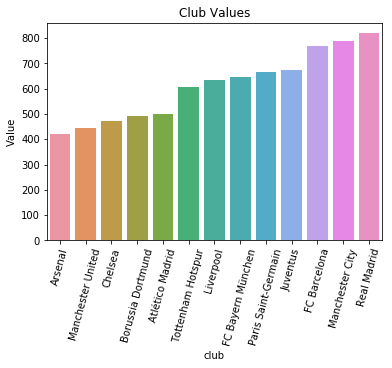

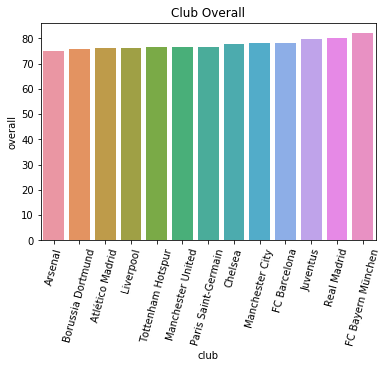

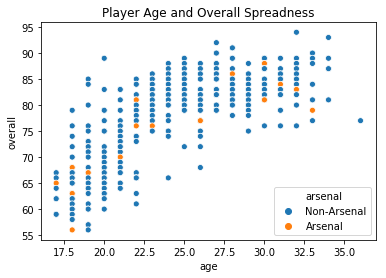

In [7]:
generaleda(dfh,2019)

From graphs and information above, it can be concluded :
1. ATK and MID position players has a higher average value and salary than DEF position players 
2. Average overall for each position is almost equal with other position
3. Arsenal FC has the lowest value and average overall compare to other 12 teams

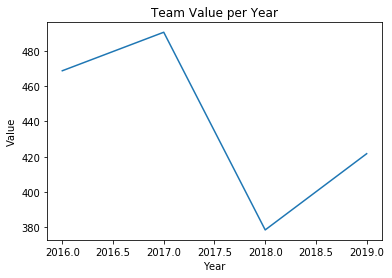

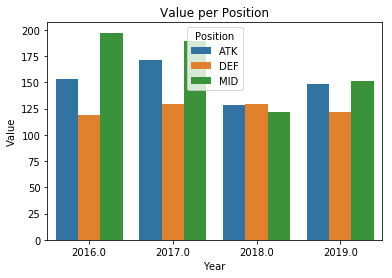

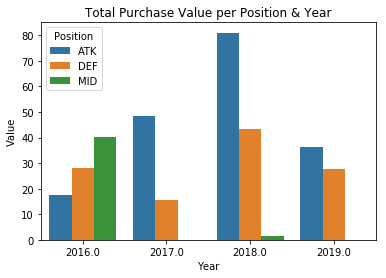

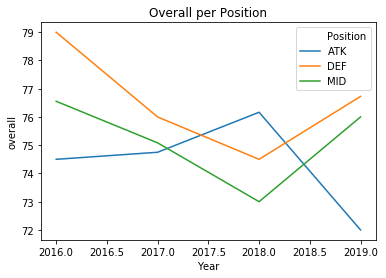

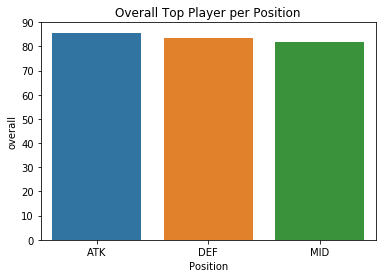

Ovensive Position Player Count: 9
Midfielder Position Player Count: 10
Defender Position Player Count: 11


In [8]:
eda(dfh,'Arsenal')

Several remarks can be drawn from EDA above :
1. Arsenal FC Values in 2019 are lower than their values in 2016 and 2017
2. Players Value per Position is balanced with each other
3. Since 2016, Arsenal only spend < 5 Million Poundsterling for MID players and over 170 Million Poundsterling for ATK players
4. ATK position has the lower average overall; however, it has the highest average overall for the starting eleven.
5. MID position has the lower average overall for the starting eleven with only a little difference from team average overall. 

Recommendation Hypotesis only for 12 selected team
- Arsenal, Manchester United, Manchester City, Chelsea, Liverpool, Tottenham Hotspurs
- FC Barcelona, Real Madrid, Atletico Madrid
- Bayern Muenchen, Dortmound, PSG, Juventus

In [8]:
import sklearn.metrics.pairwise as pw
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances
from datetime import datetime,timedelta

Determining similarity of new players to their new clubs players on the same position for each club in every transfer window

In [9]:
dfh2017 = (df2017[(df2017['club'].isin(selectedteam))&(df2017['newplayer']==1)]).sort_values(by='club',ascending=True)
dfh2018 = (df2018[(df2018['club'].isin(selectedteam))&(df2018['newplayer']==1)]).sort_values(by='club',ascending=True)
dfh2019 = (df2019[(df2019['club'].isin(selectedteam))&(df2019['newplayer']==1)]).sort_values(by='club',ascending=True)
dfh2020 = (df2020[(df2020['club'].isin(selectedteam))&(df2020['newplayer']==1)]).sort_values(by='club',ascending=True)

def similarity(df):
    a = df[['Name', 'age', 'club', 'overall','potential', 'Defending', 'General','Mental', 'Passing', 'Physical','Shooting',
             'Wage','Value','Altposition1','Altposition2','Altposition3']]
    b = df[['Name', 'age', 'club', 'overall','potential', 'Defending', 'General','Mental', 'Passing', 'Physical','Shooting',
             'Wage','Value','Altposition1','Altposition2','Altposition3']]
    
    b['similarity'] = 0
    
    for i in range (len(b)):
        Name = a.iloc[i]['Name']

        test = a[a['Name']==Name]
        club = test.iloc[0]['club']
        p1 = test.iloc[0]['Altposition1']
        p2 = test.iloc[0]['Altposition2']
        p3 = test.iloc[0]['Altposition3']

        test = test.drop(columns=['Name','club','Altposition1','Altposition2','Altposition3'],axis=1)

        test2 = a[a['club']==club]
        test2 = a[(a['Altposition1']==p1)|(a['Altposition2']==p2)|(a['Altposition3']==p3)].mean()
        test2 = pd.DataFrame(test2.to_dict(),index=['mean'])

        b['similarity'].iloc[i] = pw.cosine_similarity(test,test2)
    return b

dfh2017 = similarity(dfh2017)
dfh2018 = similarity(dfh2018)
dfh2019 = similarity(dfh2019)
dfh2020 = similarity(dfh2020)

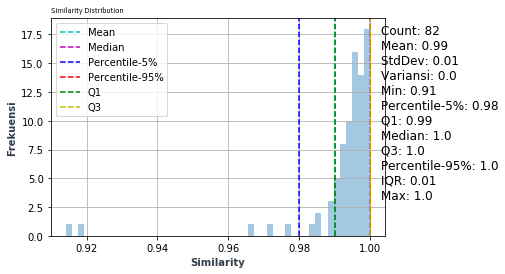

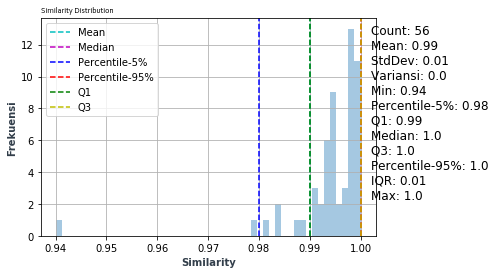

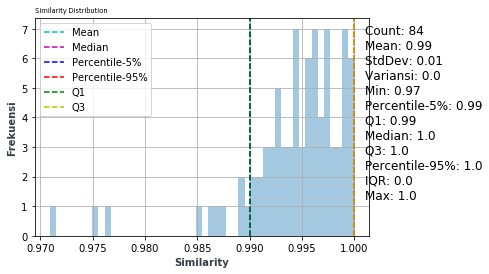

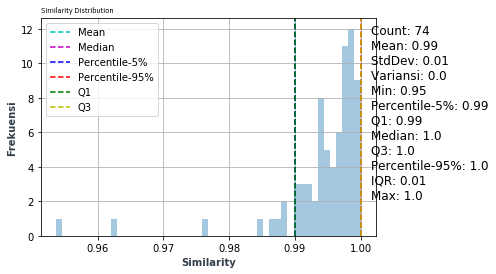

In [10]:
histograms(dfh2017,'similarity',50,['Similarity','Frekuensi'],'Similarity Distribution')
histograms(dfh2018,'similarity',50,['Similarity','Frekuensi'],'Similarity Distribution')
histograms(dfh2019,'similarity',50,['Similarity','Frekuensi'],'Similarity Distribution')
histograms(dfh2020,'similarity',50,['Similarity','Frekuensi'],'Similarity Distribution')

It can be said that majority of new player has 99% similarity with their new clubs players on the same positions; Therefore, it would be a good foundation to use similarity for creating transfer recommendation system.

Creating several new features (Change Features) for analyzing correlation between wage, value, and release with others features

In [7]:
def newfeatures(df1,df2):
    df1 = df1[['sofifa_id','overall','potential','Value','Wage']]
    df2 = pd.merge(df2,df1,on='sofifa_id')
    df2['ValueChange'] = df2['Value_x'] - df2['Value_y']
    df2['WageChange'] = df2['Wage_x'] - df2['Wage_y']
    df2['OverallChange'] = df2['overall_x'] - df2['overall_y']
    df2['PotentialChange'] = df2['potential_x']-df2['potential_y']
    return df2

dfn18 = newfeatures(df2017,df2018)
dfn19 = newfeatures(df2018,df2019)
dfn20 = newfeatures(df2019,df2020)

change_features= ['ValueChange','WageChange','OverallChange','PotentialChange']
dfn = dfn18.append(dfn19 ,ignore_index=True)
dfn = dfn.append(dfn20,ignore_index=True)
dfn = dfn[change_features].fillna(0)

Correlation Analysis for Value and Wage

In [13]:
def correlationanalysis(dfn):
    ax = sns.heatmap(dfn.corr(),cmap='YlOrRd')
    plt.show()
    
    columns = ['OverallChange','PotentialChange']
    for col in columns:
        plt.plot(dfn['ValueChange'],dfn[col],'o')                    
        plt.xlabel('Value Change')
        plt.title('Linear Correlation Value Change Variable with %s'%(col))
        plt.show()

    for col in columns:
        plt.plot(dfn['WageChange'],dfn[col],'o')
        plt.xlabel('WageChange')
        plt.title('Linear Correlation Wage Change Variable with %s'%(col))
        plt.show()
    
    return plt.show()

comparison1 = dfn.groupby(['OverallChange']).agg({'ValueChange':'mean'}).reset_index()
comparison2 = dfn.groupby(['OverallChange']).agg({'WageChange':'mean'}).reset_index()

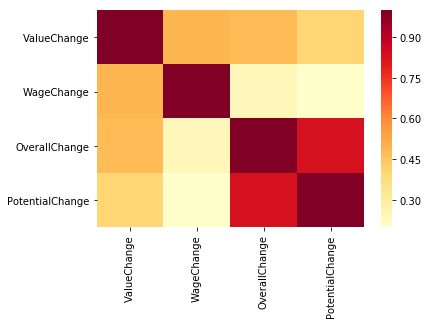

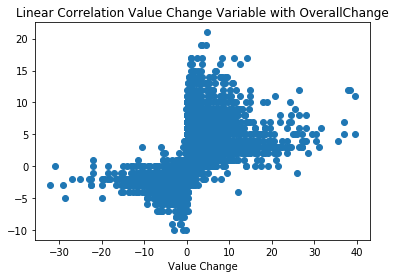

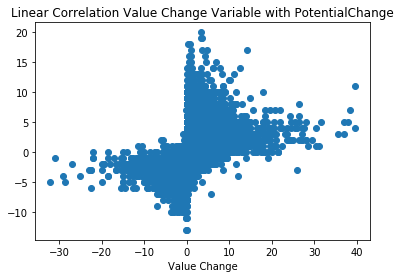

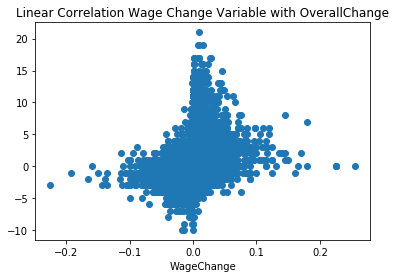

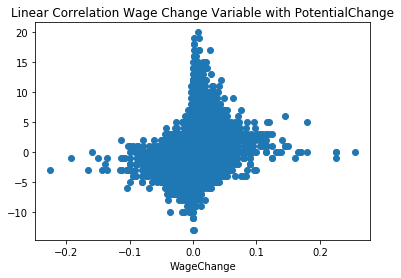

In [12]:
correlationanalysis(dfn)

From analysis above, there are several things that can be pulled of:
1. Potential and Overall has high correlation between each other
2. There are linear correlation between Value and Overall/Potential; However, there are many high overall change on low value change. It can be concluded that value change has a different coeffecient for every overall change. It also happens on correlation between Wage and Overall/Potential

Advanced EDA 
- Create prediction model for Wage feature
- Player's Improvement Coeffecient for each position on every ages

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import *
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.feature_selection import *
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.ensemble import VotingRegressor, ExtraTreesRegressor
import lightgbm as ltb
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [14]:
X = dfh[['age','overall','potential','Value']]
y = dfh['Wage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Built basic model for predicting Wage feature by using many regressor model at once 

In [15]:
def regressor(X_train,X_test,y_train,y_test):
    r_s = 42
    my_regressors=[ 
               ElasticNetCV(),
               GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, 
                                         max_depth=4, max_features='sqrt', 
                                         min_samples_leaf=15, min_samples_split=10, 
                                         loss='huber',random_state =r_s),
               ltb.LGBMRegressor(learning_rate=0.05,boosting_type='gbdt',
                             random_state=0,n_estimators=1000),
               AdaBoostRegressor(random_state=r_s),
               ExtraTreesRegressor(random_state=r_s),
               RidgeCV(),
               BayesianRidge(),
               DecisionTreeRegressor(),
               Lasso(alpha=0.00047,random_state=r_s),
               LassoCV(),
               HuberRegressor(),
               XGBRegressor(random_state=r_s)
              ]
    regressors=[]
    for my_regressor in my_regressors:
        regressors.append(my_regressor)

    scores_val=[]
    scores_train=[]
    RMSE=[]

    for regressor in regressors:
        scores_val.append(regressor.fit(X_train,y_train).score(X_test,y_test))
        scores_train.append(regressor.fit(X_train,y_train).score(X_train,y_train))
        y_pred=regressor.predict(X_test)
        RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

    results=zip(scores_val,scores_train,RMSE)
    results=list(results)
    results_score_val=[item[0] for item in results]
    results_score_train=[item[1] for item in results]
    results_RMSE=[item[2] for item in results]


    df_results=pd.DataFrame({"Algorithms":my_regressors,"Training Score":results_score_train,
                         "Validation Score":results_score_val,"RMSE":results_RMSE})
    return df_results

In [16]:
regressor(X_train,X_test,y_train,y_test)

[21:25:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Algorithms,Training Score,Validation Score,RMSE
0,ElasticNetCV(),0.813701,0.843024,0.032109
1,([DecisionTreeRegressor(criterion='friedman_ms...,0.944943,0.826692,0.033738
2,"LGBMRegressor(learning_rate=0.05, n_estimators...",0.953955,0.828908,0.033522
3,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.847611,0.852162,0.031161
4,"(ExtraTreeRegressor(random_state=1608637542), ...",0.990515,0.819243,0.034456
5,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",0.814132,0.844189,0.031990
6,BayesianRidge(),0.814117,0.844082,0.032001
7,DecisionTreeRegressor(),0.990515,0.767134,0.039843
8,"Lasso(alpha=0.00047, random_state=42)",0.814080,0.843886,0.032021
9,LassoCV(),0.813703,0.843027,0.032109


From result above, XGBoost Regressor has good Training Score and the highest Validation Score with the smallest RMSE. Therefore, XGBoost will be used to determine Feature Importance for Wage Feature

Feature Importance using XGBoost Regressor

In [17]:
def featureimportance(X_train,y_train):
    model = XGBRegressor(random_state=42).fit(X_train,y_train)
    plt.barh(X.columns, model.feature_importances_)
    plt.xlabel("Xgboost Feature Importance")
    return plt.show()

[21:27:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


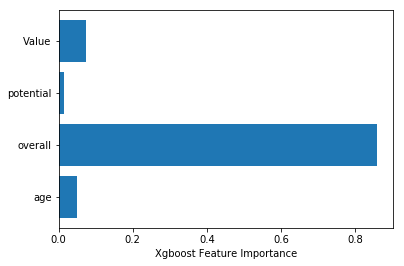

In [18]:
featureimportance(X_train,y_train)

Overall has the highest score for Feature Importance with more than 80% score. In contrary, age and value is not that important for predicting player's Wage features

 - Determining Arsenal FC Player's Improvement Coeffecient on every position and every age
 - Create a clubs list for loan recommendation

In [14]:
dfa = pd.concat([dfn18,dfn19,dfn20],ignore_index=True)
dfa = dfa.rename(columns={'overall_x':'Overall','potential_x':'potential','Value_x':'Value','Wage_x':'Wage'})
#dfa.to_csv(r"C:\Users\Armananda Ferialdy\Documents\Dataset\fifaage.csv")

In [15]:
def clubloanrecommendation(df,position,age):
    df = df.groupby(['age','club','Position']).agg({'OverallChange':'mean','PotentialChange':'mean'}).reset_index().sort_values(by='OverallChange',ascending=False)
    df = df[(df['Position']==position)&(df['age']>=age)]
    return df[:10]

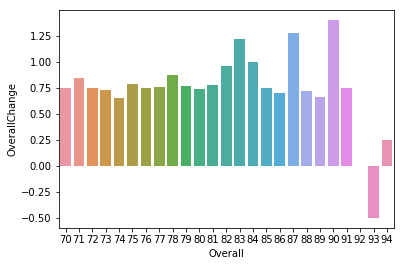

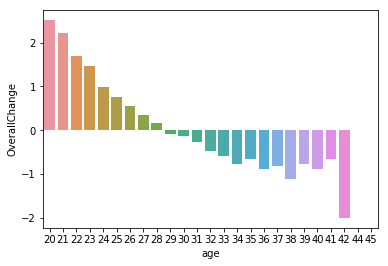

In [16]:
overall = dfa.groupby(['Overall']).agg({'OverallChange':'mean','PotentialChange':'mean'}).reset_index()
overall = overall.sort_values(by='Overall',ascending=False)[:25]
ax = sns.barplot(x='Overall',y='OverallChange',data=overall)
plt.show()

overall = dfa.groupby(['age']).agg({'OverallChange':'mean','PotentialChange':'mean'}).reset_index()
overall = overall.sort_values(by='age',ascending=False)[:25]
ax = sns.barplot(x='age',y='OverallChange',data=overall)

From the barchart above, it can be said that each overall has equal average improvement coeffecient; in other hand, age is inversely proportional to overall change

In [17]:
def improvementcoef(df,Club):
    df = df[df['club']==Club]
    df = df.groupby(['age','Position']).agg({'OverallChange':'mean','PotentialChange':'mean'}).reset_index()
    ax = sns.barplot(x='age',y='OverallChange',hue='Position',data=df)
    plt.show()
    ay = sns.barplot(x='age',y='PotentialChange',hue='Position',data=df)
    plt.show()
    return plt.show()

def improvementcoefdata(df,Club):
    df = df[df['club']==Club]
    df = df.groupby(['age','Position']).agg({'OverallChange':'mean','PotentialChange':'mean'}).reset_index()
    return df

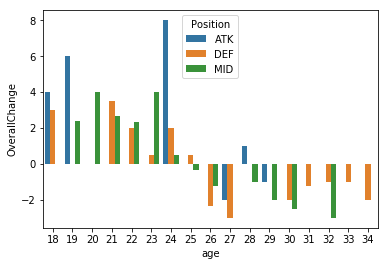

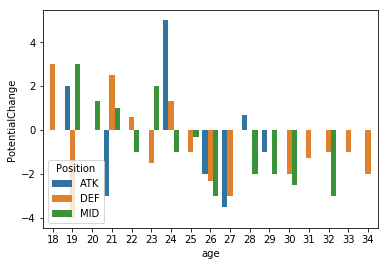

In [18]:
improvementcoef(dfa,'Arsenal')

Arsenal FC has a bad improvement coeffecient for players with age above 24 for every position. However, they have quite good improvement coeffecient for players with age below 24. This can also means that almost all Arsenal player with age above 24 are suffering overall decreasing resulting value decreasing 

Transfer Recommendation System

Based on previous analysis, it can be concluded that Arsenal FC needs MID and DEF players for increasing their values since their starting eleven average overall and team average overall on MID and DEF position are quite low. Moreover; they havent spend more than 10 million poundsterling for purchasing MID player since 2016

In [19]:
import sklearn.metrics.pairwise as pw
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances
def transrecom(input_dataframe,Name):    
    pivot_item_based = pd.pivot_table(input_dataframe,
                                      index=['Name','age','overall','Value'])  
    sparse_pivot = sparse.csr_matrix(pivot_item_based.fillna(0))
    recommender = pw.cosine_similarity(sparse_pivot)
    recommender_df = pd.DataFrame(recommender, 
                                  columns=pivot_item_based.index,
                                  index=pivot_item_based.index)
    ## Item Rating Based Cosine Similarity
    cosine_df = pd.DataFrame(recommender_df[Name])
    cosine_df.reset_index(level=3, inplace=True)
    cosine_df.reset_index(level=2, inplace=True)
    cosine_df.reset_index(level=1, inplace=True)
    cosine_df.reset_index(level=0, inplace=True)
    cosine_df.columns = ['Name','age','overall','Value','Similarity']
    cosine_df = cosine_df.sort_values(by='Similarity',ascending=False)
    
    return cosine_df[1:30]

In [20]:
def recommendation(club,position,dataclus,data):
    test = dataclus.loc[(dataclus['Altposition1']==position)|(dataclus['Altposition2']==position)
                        |(dataclus['Altposition3']==position)]
    test = test.loc[(dataclus['club']==club)].mean()
    test = pd.DataFrame(test.to_dict(),index=['99999'])
    test['Name'] = 'test1'
    cols = test.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    data = data.append(test,ignore_index=True)
    Name = test.iloc[0]['Name']
    
    return transrecom(data,Name)

In [21]:
data = dfh20[['Name','Defending','General','Mental','Passing','Physical','Value','overall','potential','Wage',
           'Shooting','age','club','Altposition1','Altposition2','Altposition3']]
test = dfh20[['Name','Defending','General','Mental','Passing','Physical','Value','overall','potential','Shooting','age','Wage']]

In [22]:
recommendationdf1 = recommendation('Arsenal','CB',data,test)
recommendationdf1['Position'] = 'DEF'

recommendationdf1 = recommendationdf1[(recommendationdf1['age']<25)
                                      &(recommendationdf1['Value']<50)
                                      &(recommendationdf1['overall']>79)]

recommendationdf2 = recommendation('Arsenal','CAM',data,test)
recommendationdf2['Position'] = 'MID'

recommendationdf2 = recommendationdf2[(recommendationdf2['age']<25)
                                      &(recommendationdf2['Value']<50)
                                      &(recommendationdf2['overall']>79)]

In [23]:
arsenal = improvementcoefdata(dfa,'Arsenal')

recommendation1 = pd.merge(recommendationdf1,arsenal,how='left')
recommendation1['OverallChange'] = recommendation1['OverallChange'].round(0)
recommendation1 = pd.merge(recommendation1,comparison1,on='OverallChange',how='left')
recommendation2 = pd.merge(recommendationdf2,arsenal,how='left')
recommendation2['OverallChange'] = recommendation2['OverallChange'].round(0)
recommendation2 = pd.merge(recommendation2,comparison1,on='OverallChange',how='left')

recommendation1['FutureOverall'] = recommendation1['overall'] + recommendation1['OverallChange']
recommendation1['FutureValue'] = recommendation1['Value'] + recommendation1['ValueChange']
recommendation1 = recommendation1[['Name','age','overall','Value','Similarity','Position','FutureOverall','FutureValue']]

recommendation2['FutureOverall'] = recommendation2['overall'] + recommendation2['OverallChange']
recommendation2['FutureValue'] = recommendation2['Value'] + recommendation2['ValueChange']
recommendation2 = recommendation2[['Name','age','overall','Value','Similarity','Position','FutureOverall','FutureValue']]

In [24]:
b = recommendation2[['Name','age','overall','Value','Similarity','Position','FutureOverall','FutureValue']]
for i in range(len(recommendation1)):
    a = recommendation2[['Name','age','overall','Value','Similarity','Position','FutureOverall','FutureValue']]
    a['Name 2'] = recommendation1['Name'][i]
    b = b.append(a,ignore_index=True)

b = b[b['Name 2'].notnull()]

recommendation1 = recommendation1.rename(columns={'Name':'Name 2'})
final = pd.merge(b,recommendation1,on='Name 2',how='left')

final['Total Price'] = final['Value_x'] + final['Value_y']
final['Total Future Value'] = final['FutureValue_x'] + final['FutureValue_y']

final = final[['Name','Name 2','overall_x','overall_y','Total Price','Total Future Value']]
final = final.rename(columns={'overall_x' : 'Overall 1','overall_y':'Overall 2'})

Dataframe table below is the final result of transfer recommendation for Arsenal FC MID and DEF players. It also has made into multiple purchase combination providing their total price and projected future value. Assuming Arsenal FC only has 90 million poundsterling to spend on transfer window, it can be said that the safe choice for Arsenal FC are the combination with total price below 70 million poundsterling (assuming there will be increase on players values)

In [25]:
final.sort_values(by=['Total Price','Total Future Value'],ascending=(True,True))

,Name,Name 2,Overall 1,Overall 2,Total Price,Total Future Value
29,A. Correa,K. Zouma,82.0,80.0,46.5,47.910645
24,A. Correa,Mario Hermoso,82.0,80.0,48.0,49.410645
14,A. Correa,V. Lindelöf,82.0,81.0,51.0,52.410645
27,Marco Asensio,K. Zouma,83.0,80.0,51.5,55.062939
28,T. Lemar,K. Zouma,83.0,80.0,51.5,55.062939
4,A. Correa,Éder Militão,82.0,81.0,52.0,54.251342
22,Marco Asensio,Mario Hermoso,83.0,80.0,53.0,56.562939
23,T. Lemar,Mario Hermoso,83.0,80.0,53.0,56.562939
12,Marco Asensio,V. Lindelöf,83.0,81.0,56.0,59.562939
13,T. Lemar,V. Lindelöf,83.0,81.0,56.0,59.562939


Loaning and selling players would also have increase team values on various way. Therefore, by using loan recommendation club list, it would makes loaning players increase team values in the futures. Selling a non improve player would also be a great step to do

In [26]:
arsenalfc = dfh20[dfh20['club']=='Arsenal']
arsenalfc

,Unnamed: 0,sofifa_id,Name,age,club,overall,potential,Defending,General,Mental,Passing,Physical,ReleaseClause,Position,Shooting,Wage,Value,loaned_from,joined,contract_valid_until,Altposition1,Altposition2,Altposition3,Year,joinedyear,newplayer
32,32,188567,P. Aubameyang,30,Arsenal,88,88,31,80,76,74,81,108.300,ATK,81,0.205,57.000,NaN,2018-01-31,2021.0,LS,ST,RS,2019.0,2018.0,0
69,69,193301,A. Lacazette,28,Arsenal,86,86,35,86,83,74,80,87.400,ATK,80,0.165,46.000,NaN,2017-07-05,2022.0,LF,CF,RF,2019.0,2017.0,0
136,136,172879,Sokratis,31,Arsenal,84,84,85,59,75,53,74,43.700,DEF,49,0.115,23.000,NaN,2018-07-02,2021.0,LCB,CB,RCB,2019.0,2018.0,0
138,138,176635,M. Özil,30,Arsenal,84,84,21,86,73,86,67,56.100,MID,71,0.125,29.500,NaN,2013-09-02,2021.0,LAM,CAM,RAM,2019.0,2013.0,0
183,183,226110,N. Pépé,24,Arsenal,83,88,30,84,73,75,81,68.100,ATK,76,0.097,34.500,NaN,2019-08-01,2024.0,LW,LF,RW,2019.0,2019.0,1
224,224,179944,David Luiz,32,Arsenal,83,83,81,72,74,74,68,31.400,DEF,71,0.105,16.500,NaN,2019-08-08,2021.0,LCB,CB,RCB,2019.0,2019.0,1
252,252,223959,L. Torreira,23,Arsenal,82,87,82,80,78,77,76,53.300,MID,67,0.080,27.000,NaN,2018-07-12,2023.0,LDM,CDM,RDM,2019.0,2018.0,0
337,337,222509,Dani Ceballos,22,Arsenal,81,87,70,85,78,80,70,NaN,MID,63,0.082,24.000,Real Madrid,NaN,2020.0,LCM,CM,RCM,2019.0,NaN,0
343,343,199503,G. Xhaka,26,Arsenal,81,84,69,74,79,81,60,42.500,MID,69,0.094,21.500,NaN,2016-07-01,2021.0,LCM,CM,RCM,2019.0,2016.0,0
409,409,192883,H. Mkhitaryan,30,Arsenal,81,81,54,83,76,78,74,32.300,MID,73,0.094,17.000,NaN,2018-01-22,2021.0,LAM,CAM,RAM,2019.0,2018.0,0


There are several ATK position players with relatively low overall has a great potential but a lack of game played. Therefore it would be good step to loaning those players to one of these clubs

In [27]:
clubloanrecommendation(dfa,'ATK',20)

,age,club,Position,OverallChange,PotentialChange
1261,20,Albacete BP,ATK,13.0,13.0
2169,20,Standard de Liège,ATK,12.0,9.0
5046,23,Belgrano de Córdoba,ATK,11.0,11.0
2216,20,US Salernitana 1919,ATK,11.0,8.0
2484,21,Bristol Rovers,ATK,11.0,11.0
3691,22,BSC Young Boys,ATK,11.0,11.0
1567,20,FC København,ATK,10.5,2.0
1661,20,Genoa,ATK,10.5,9.5
8662,25,Omiya Ardija,ATK,10.0,8.0
4380,22,Newcastle Jets,ATK,10.0,6.0


There are range between 47 and 66 million poundsterling future value in combination of potential purchased players options that would means 11% - 15% increase for Arsenal FC value next year. Moreover there would be 10+ overall and potential increase for loaned player if they were loaned to one of teams on recommendation list. 

In conclusion, if all the strategies to purchasing and loaning players based on recommendation system is succesfull, Arsenal FC team values will increase approximately 11% - 15% from 420 million poundsterling.